In [ ]:
##########################################################################################
# Versión 1
# Sin parámetros todavía.
# SOLO PARA PRUEBAS. No es válido para el proyecto
##########################################################################################

In [ ]:
# librerías necesarias

import pandas as pd
import numpy as np
import plotly 
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

np.random.seed(4)

In [ ]:

df = pd.read_csv('airWeather_2013-2019.csv', sep=';', index_col='FECHA', parse_dates=['FECHA'])
df.NOM_ESTACION.unique()

array(['VALÈNCIA  PISTA DE SILLA', 'VALÈNCIA  VIVERS',
       'VALÈNCIA  POLITÈCNIC', 'VALÈNCIA  AVD. FRANCIA',
       'VALÈNCIA  MOLÍ DEL SOL', 'VALÈNCIACONSELLERIA METEO.',
       'VALÈNCIA  BULEVARD SUD', 'VALÈNCIA CENTRE'], dtype=object)

In [ ]:
df.isnull().sum()

COD_ESTACION        0
NOM_ESTACION        0
SO2              4660
CO              11481
NO               4209
NO2              4218
NOx              4216
O3               3984
PM10             5522
PM2.5            7616
PM1             11941
lluvias          1347
Temp             1240
VelocVent         908
VelocVentMax     1267
HoraRacha        1434
TempMax          1591
TempMin          1591
dtype: int64

In [ ]:
# eliminar filas sin Temp

df = df[df['Temp'].notnull()]
df.isnull().sum()

COD_ESTACION        0
NOM_ESTACION        0
SO2              4373
CO              10743
NO               4007
NO2              4016
NOx              4014
O3               3775
PM10             5227
PM2.5            7173
PM1             11161
lluvias           260
Temp                0
VelocVent          12
VelocVentMax      176
HoraRacha         343
TempMax           351
TempMin           351
dtype: int64

In [ ]:
df = df[df['NOM_ESTACION']=='VALÈNCIA  PISTA DE SILLA']
df.NOM_ESTACION.unique()

array(['VALÈNCIA  PISTA DE SILLA'], dtype=object)

In [ ]:
df.isnull().sum()

COD_ESTACION      0
NOM_ESTACION      0
SO2             257
CO              274
NO              135
NO2             135
NOx             135
O3              152
PM10             67
PM2.5           432
PM1             765
lluvias         175
Temp              0
VelocVent         0
VelocVentMax    161
HoraRacha       161
TempMax         163
TempMin         163
dtype: int64

In [ ]:
"""# Hay una fila con nulos
df = df.dropna()
df.isnull().sum()"""

'# Hay una fila con nulos\ndf = df.dropna()\ndf.isnull().sum()'

In [ ]:
df.head()

,COD_ESTACION,NOM_ESTACION,SO2,CO,NO,NO2,NOx,O3,PM10,PM2.5,PM1,lluvias,Temp,VelocVent,VelocVentMax,HoraRacha,TempMax,TempMin
FECHA,,,,,,,,,,,,,,,,,,
2013-01-01,46250030,VALÈNCIA PISTA DE SILLA,NaN,NaN,NaN,NaN,NaN,41.0,11.0,NaN,NaN,NaN,12.8,0.6,NaN,NaN,NaN,NaN
2013-01-02,46250030,VALÈNCIA PISTA DE SILLA,NaN,NaN,NaN,NaN,NaN,21.0,26.0,NaN,NaN,NaN,11.4,0.3,NaN,NaN,NaN,NaN
2013-01-03,46250030,VALÈNCIA PISTA DE SILLA,NaN,NaN,NaN,NaN,NaN,25.0,22.0,NaN,NaN,NaN,10.6,0.3,NaN,NaN,NaN,NaN
2013-01-04,46250030,VALÈNCIA PISTA DE SILLA,NaN,NaN,NaN,NaN,NaN,21.0,28.0,NaN,NaN,NaN,11.7,0.2,NaN,NaN,NaN,NaN
2013-01-05,46250030,VALÈNCIA PISTA DE SILLA,NaN,NaN,NaN,NaN,NaN,17.0,28.0,NaN,NaN,NaN,13.6,0.3,NaN,NaN,NaN,NaN


In [ ]:
# Guardamos la temperatura y la del día siguiente
df2 = df[['Temp']]
df3 = df2
df3=df3.shift(periods=-1)
df2['TempNextDay'] = df3['Temp']
df2 = df2.dropna()
df2

<ipython-input-10-34c5cb103375>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TempNextDay'] = df3['Temp']


,Temp,TempNextDay
FECHA,,
2013-01-01,12.80,11.40
2013-01-02,11.40,10.60
2013-01-03,10.60,11.70
2013-01-04,11.70,13.60
2013-01-05,13.60,13.10
...,...,...
2019-12-24,17.80,15.95
2019-12-25,15.95,16.75
2019-12-26,16.75,13.55


In [ ]:
"""# Predecir el nivel de contaminación para el día siguiente a uno dado
# dependerá de la variable tiempo (serie temporal)


# Nos crearemos un DataFrame con la fecha, el precio máximo para esa fecha y el precio máximo del dia siguiente
df2 = df.drop(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
df3 = df2
df3=df3.shift(periods=-1)
df2['HighNextDay'] = df3['High']
df2 = df2.dropna()
df2"""

"# Predecir el nivel de contaminación para el día siguiente a uno dado\n# dependerá de la variable tiempo (serie temporal)\n\n\n# Nos crearemos un DataFrame con la fecha, el precio máximo para esa fecha y el precio máximo del dia siguiente\ndf2 = df.drop(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)\ndf3 = df2\ndf3=df3.shift(periods=-1)\ndf2['HighNextDay'] = df3['High']\ndf2 = df2.dropna()\ndf2"

In [ ]:
# Vamos a coger del 2013 al 2017 para entrenamiento y los datos del 2018 para testear
train = df2[:'2017'].iloc[:,:]
test = df2['2017':'2018'].iloc[:,:]

<function matplotlib.pyplot.show(close=None, block=None)>

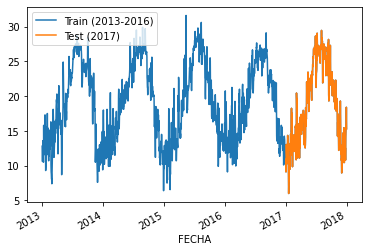

In [ ]:
train['Temp'].plot(legend=True)
test['Temp'].plot(legend=True)
plt.legend(['Train (2013-2016)', 'Test (2017)'])
plt.show

## **Normalización**

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))

X_train = sc.fit_transform(train['Temp'].values.reshape(-1,1))
y_train = sc.fit_transform(train['TempNextDay'].values.reshape(-1,1))

## **Modelo**

In [ ]:
# Specify the structure of a Neural Network
model = Sequential(name="Model-with-One-Input") 
model.add(Input(shape=(1,), name='Input-Layer'))
model.add(Dense(2, activation='softplus', name='Hidden-Layer')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))


# Compile keras model
model.compile(optimizer='adam', loss='binary_crossentropy')


# Fit keras model on the dataset
model.fit(X_train, y_train, batch_size=10, epochs=3)

# Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary()
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # weights
    print("  --Biases: ", layer.get_weights()[1]) # biases

Epoch 1/3
181/181 [==============================] - 0s 760us/step - loss: 0.7107
Epoch 2/3
181/181 [==============================] - 0s 792us/step - loss: 0.6864
Epoch 3/3
181/181 [==============================] - 0s 713us/step - loss: 0.6787

-------------------- Model Summary --------------------
Model: "Model-with-One-Input"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer (Dense)        (None, 2)                 4         
                                                                 
 Output-Layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  Hidden-Layer
  --Kernels (Weights):  [[-1.301279    0.26712078]]
  --Biases

## **Predicción**

In [ ]:
X_test = sc.fit_transform(test['Temp'].values.reshape(-1,1))
y_test = sc.fit_transform(test['TempNextDay'].values.reshape(-1,1))

# Realizamos la prediccion y aplicamos normalización inversa para que esté en escala real
y_predicted = model.predict(X_test)
y_predicted = sc.inverse_transform(y_predicted)


## **Visualizar resultados**

<ipython-input-17-6c03a7aaed1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TempPredicted'] = y_predicted


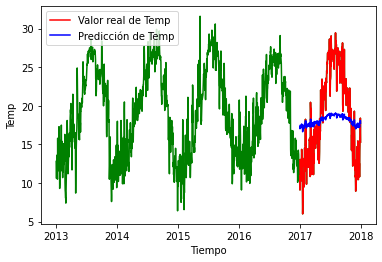

In [ ]:
test['TempPredicted'] = y_predicted
plt.plot(train['Temp'], color='green')
plt.plot(test['Temp'], color='red', label='Valor real de Temp')
plt.plot(test['TempPredicted'], color='blue', label='Predicción de Temp')
plt.xlabel('Tiempo')
plt.ylabel('Temp')
plt.legend()
plt.show()

# **LSTM (Long Short-Term Memory)**

Las LSTM son un tipo especial de redes recurrentes. La característica principal de las redes recurrentes es que la información puede persistir introduciendo bucles en el diagrama de la red, por lo que, básicamente, pueden «recordar» estados previos y utilizar esta información para decidir cuál será el siguiente. Esta característica las hace muy adecuadas para manejar series cronológicas.

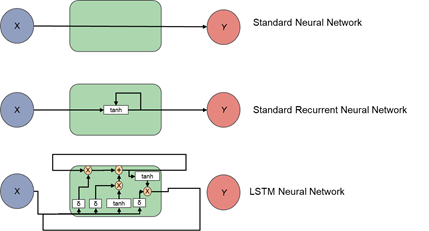



En A), Y depende únicamente de X. En B), Y depende de X y del valor anterior de Y. En C), la lógica es más compleja para mejorar el efecto de instancias anteriores de Y (y, por consiguiente, de X).

In [ ]:
# Vamos a coger del 2013 al 2017 para entrenamiento y los datos del 2018 para testear
# Para poder introducir los datos en una red neuronal hay que transformarlos, ya que solo funciona con arrays
df2 = df[['Temp']]
train = df2[:'2017']
test = df2['2017':'2018']
df2

,Temp
FECHA,
2013-01-01,12.80
2013-01-02,11.40
2013-01-03,10.60
2013-01-04,11.70
2013-01-05,13.60
...,...
2019-12-25,15.95
2019-12-26,16.75
2019-12-27,13.55


In [ ]:
# Tiene que ser un vector columna
train.shape

(1808, 1)

In [ ]:
train

,Temp
FECHA,
2013-01-01,12.80
2013-01-02,11.40
2013-01-03,10.60
2013-01-04,11.70
2013-01-05,13.60
...,...
2017-12-27,15.00
2017-12-28,15.80
2017-12-29,15.55


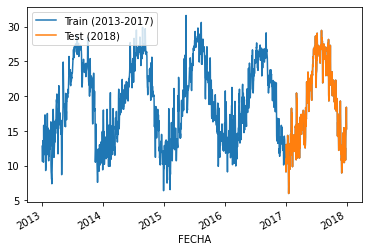

In [ ]:
train['Temp'].plot(legend=True)
test['Temp'].plot(legend=True)
plt.legend(['Train (2013-2017)', 'Test (2018)'])
plt.show()

## **Normalización**

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

## **Estructura datos entrada**

In [ ]:
# Hay que crear una estructura de datos para indicarle a la red lo que tiene que recordar 
# y poder hacer una predección en base a datos anteriores
X_train = []
y_train = []

# Estructura de datos con 60 pasos y un valor de salida
# 60 timesteps significa que para un día dado la red es capaz de mirar los 60 días anteriores:
# 60 precios anteriores al día actual y en base a esa información predice el precio de la acción 
for i in range(60,len(train_scaled)):
    # X: para cada día hacemos un bloque correspondiente al precio de los 60 días anteriores
    X_train.append(train_scaled[i-60:i,0])
    # Y: el precio del día
    y_train.append(train_scaled[i,0])

# Tenemos una matriz donde cada fila contiene 60 columnas correspondientes a los 60 días anteriores
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape X_train para que se ajuste al modelo en Keras
# añadiendo una nueva dimensión 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1748, 60, 1)

## **Modelo**

Creamos un modelo secuencial al que iremos añadiendo capas, que pueden ser:

*   Dense: Capa de neuronas artificiales
*   LSTM: Capa de neuronas con capacidad de memoria
*   Dropout: Es una técnica de regularización que elimina conexiones neuronales para evitar el sobreajuste, de esta forma se evita que el algoritmo memorice los datos en vez de aprender de ellos. 

Antes de crear la Red LSTM debemos reajustar los sets que acabamos de obtener, para indicar que cada ejemplo de entrenamiento a la entrada del modelo será un vector de 60x1.

Para el caso de cada una de las salidas (almacenadas en y_train) debemos simplemente especificar que su tamaño será igual a 1, que corresponde al único valor predicho por la red.

In [ ]:
# Definimos el tamaño de los datos de entrada y de salida
dim_entrada = (X_train.shape[1],1)
dim_salida = 1

modelo = Sequential()
# Añadimos la primera capa y especificamos el número de neuromas (50) y el tamaño de cada dato de entrada
modelo.add(LSTM (units=50, return_sequences=True, input_shape=dim_entrada))
modelo.add(Dropout(0.2))
# Añadimos la segunda capa
modelo.add(LSTM (units=50, return_sequences=True))
modelo.add(Dropout(0.2))
# Añadimos la tercera capa
modelo.add(LSTM (units=50, return_sequences=True))
modelo.add(Dropout(0.2))
# Añadimos la cuarta capa
modelo.add(LSTM (units=50))
modelo.add(Dropout(0.2))
# Añadimos la capa de salida (Dense) y especificamos que el campo de salida es igual a 1
modelo.add(Dense(units=dim_salida))

## **Compilación**

*   El optimizador se encarga de optimizar y actualizar los pesos de la red. Usaremos el algoritmo adam que es el que mejores resultados nos aporta.
*   loss: Cuando la red hace una predicción coge el valor real y lo compará con la predicción. Para calcular el error de predicción, se utilizará el método error cuadrático medio. 

In [ ]:
# Compilamos el modelo definiendo la función de error (loss) y el método que se usa para minimizarla (optimizer)
modelo.compile(optimizer='adam', loss='mean_squared_error')

## **Entrenamiento**

*   epochs: Especificamos las veces que la red propagara el error hacia atrás para aprender y hacer mejores predicciones. Es la cantidad de veces que la red realizará una predicción y propagara hacia atrás el error, para aprender de él y hacer mejores predicciones
*   batch_size: Para este proceso de predicción, corrección y propagación hacia atrás, no lo haremos con un solo bloque de datos, si no de 32. Si no el entrenamiento sería demasiado pesado para la red, el tener que actualizar los pesos a cada dato. Vamos actualizando los pesos con bloques de datos.

In [ ]:
# Entrenamos el modelo con epochs=100 (100 iteraciones) y batch_size=32 (lotes de 32 datos)
modelo.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
55/55 [==============================] - 8s 58ms/step - loss: 0.0281
Epoch 2/10
55/55 [==============================] - 3s 58ms/step - loss: 0.0137
Epoch 3/10
55/55 [==============================] - 3s 59ms/step - loss: 0.0125
Epoch 4/10
55/55 [==============================] - 3s 59ms/step - loss: 0.0144
Epoch 5/10
55/55 [==============================] - 3s 58ms/step - loss: 0.0126
Epoch 6/10
55/55 [==============================] - 3s 60ms/step - loss: 0.0118
Epoch 7/10
55/55 [==============================] - 3s 59ms/step - loss: 0.0112
Epoch 8/10
55/55 [==============================] - 3s 59ms/step - loss: 0.0111
Epoch 9/10
55/55 [==============================] - 3s 59ms/step - loss: 0.0107
Epoch 10/10
55/55 [==============================] - 3s 59ms/step - loss: 0.0102


## **Predicciones**

Hay que preparar los datos como en el caso de train, esto es, hacemos bloques de 60 días para predecir el valor de la acción en el siguiente día.

In [ ]:
test_scaled = sc.fit_transform(test)

X_test = []
for i in range(60,len(test_scaled)):
    X_test.append(test_scaled[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# Realizamos la prediccion y aplicamos normalización inversa para que esté en escala real
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

prediccion

array([[14.281994 ],
       [14.325955 ],
       [14.33028  ],
       [14.3624935],
       [14.469493 ],
       [14.652733 ],
       [14.915281 ],
       [15.244567 ],
       [15.586294 ],
       [15.890481 ],
       [16.097267 ],
       [16.213936 ],
       [16.249502 ],
       [16.214706 ],
       [16.116081 ],
       [15.982011 ],
       [15.835412 ],
       [15.694783 ],
       [15.564179 ],
       [15.464962 ],
       [15.38723  ],
       [15.300701 ],
       [15.201179 ],
       [15.083119 ],
       [14.975513 ],
       [14.894557 ],
       [14.864895 ],
       [14.880225 ],
       [14.938254 ],
       [15.041863 ],
       [15.173137 ],
       [15.310573 ],
       [15.432804 ],
       [15.525944 ],
       [15.594551 ],
       [15.643799 ],
       [15.67876  ],
       [15.708442 ],
       [15.74628  ],
       [15.8074   ],
       [15.890754 ],
       [16.004683 ],
       [16.149239 ],
       [16.300863 ],
       [16.43349  ],
       [16.510675 ],
       [16.51748  ],
       [16.46

## **Visualización del resultado**

In [ ]:
resultados = test.tail(len(test)-60)
resultados['Prediccion'] = prediccion

<ipython-input-28-d22ede58e163>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados['Prediccion'] = prediccion


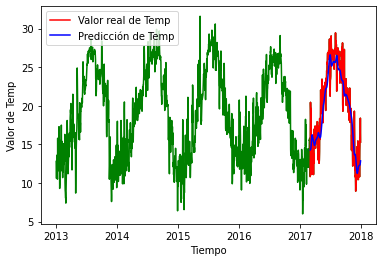

In [ ]:
plt.plot(train['Temp'], color='green')
plt.plot(resultados['Temp'], color='red', label='Valor real de Temp')
plt.plot(resultados['Prediccion'], color='blue', label='Predicción de Temp')
#plt.ylim(1.1 * np.min(resultados['Prediccion'])/2, 1.1 * np.max(resultados['Prediccion']))
plt.xlabel('Tiempo')
plt.ylabel('Valor de Temp')
plt.legend()
plt.show()

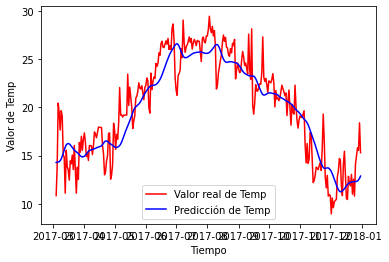

In [ ]:
plt.plot(resultados['Temp'], color='red', label='Valor real de Temp')
plt.plot(resultados['Prediccion'], color='blue', label='Predicción de Temp')
plt.xlabel('Tiempo')
plt.ylabel('Valor de Temp')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

# Error absoluto medio en la predicción
mean_absolute_error(resultados['Prediccion'], resultados['Temp'])

1.7460228833285247

## **Conclusiones**

Una vez creado el modelo puede tener una aplicación práctica. Cuando cierra el mercado y ya conocemos el máximo del día se puede inferir el máximo del día siguiente y efectuar las operaciones oportunas.